In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf

from random import randint

from keras.preprocessing import sequence 
from keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Conv2D, Embedding, Flatten, Dropout

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits, load_iris
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC

import matplotlib.pyplot as plt

# A first example

In [43]:
raw = load_iris()
X = raw['data']
y = raw['target']

In [44]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

model4 = LinearSVC(multi_class='ovr',max_iter=4500)
model4.fit(X_train,y_train)

predicted = model4.predict(X_test)
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

[[13  0  0]
 [ 0 11  3]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.79      1.00      0.88        11
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## What are 'precision' and 'recall'?

![Precision and Recall](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

# Recognizing hand-written digits

In [2]:
digits = load_digits()

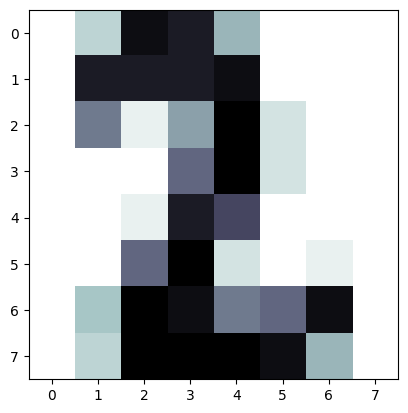

In [3]:
X = digits['images']
N = X.shape[0]
plt.imshow(X[randint(0,N)], cmap='bone_r')
#X = X.reshape((-1,8,8,))

In [4]:
binarizer = LabelBinarizer()
Y = binarizer.fit_transform(digits['target'])
Y.shape

(1797, 10)

In [5]:
X_test, X_train, Y_test, Y_train = train_test_split(X,Y,train_size=0.9)

In [6]:
model = Sequential()
model.add(Conv2D(3, 2, activation='softmax', input_shape=(8,8,1,)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [22]:
model.fit(X_train, Y_train,
          batch_size = 32,
          epochs = 15,
          validation_data = (X_test, Y_test))

Epoch 1/15
6/6 [==============================] - 0s 45ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9227
Epoch 2/15
6/6 [==============================] - 0s 33ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9227
Epoch 3/15
6/6 [==============================] - 0s 31ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9239
Epoch 4/15
6/6 [==============================] - 0s 28ms/step - loss: 0.0144 - accuracy: 0.9944 - val_loss: 0.0571 - val_accuracy: 0.9246
Epoch 5/15
6/6 [==============================] - 0s 31ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9258
Epoch 6/15
6/6 [==============================] - 0s 33ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9252
Epoch 7/15
6/6 [==============================] - 0s 34ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9246
Epoch 8/15
6/6 [===========

In [23]:
Y_pred = model.predict(X_test).argmax(axis=1)
YY_test = Y_test.argmax(axis=1)
confusion_matrix(YY_test,Y_pred)

51/51 [==============================] - 0s 2ms/step


array([[162,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0, 150,   3,   0,   0,   0,   1,   0,   4,   8],
       [  1,   2, 155,   0,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0, 140,   0,   5,   0,   2,   8,   6],
       [  0,   0,   0,   0, 152,   0,   0,   3,   1,   7],
       [  0,   0,   0,   0,   0, 154,   2,   0,   0,  10],
       [  1,   0,   0,   0,   0,   0, 158,   0,   0,   0],
       [  0,   0,   0,   0,   3,   5,   0, 147,   7,   2],
       [  0,   4,   4,   4,   0,   5,   3,   1, 136,   1],
       [  0,   0,   0,   1,   1,   2,   0,   0,   6, 146]])

In [24]:
print(classification_report(YY_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       164
           1       0.96      0.90      0.93       166
           2       0.96      0.97      0.97       159
           3       0.97      0.86      0.91       162
           4       0.97      0.93      0.95       163
           5       0.90      0.93      0.91       166
           6       0.95      0.99      0.97       159
           7       0.96      0.90      0.93       164
           8       0.84      0.86      0.85       158
           9       0.81      0.94      0.87       156

    accuracy                           0.93      1617
   macro avg       0.93      0.93      0.93      1617
weighted avg       0.93      0.93      0.93      1617



# Text analysis

We are going to use the following [dataset](https://archive.ics.uci.edu/dataset/484/travel+reviews).

In [27]:
data = pd.read_csv('../data/tripadvisor_review.csv')
X = data.iloc[:,1:10]
X

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18
...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12


In [32]:
model = KMeans(n_clusters=3)
model.fit(X)
classes = model.predict(X)
project = PCA(n_components=2)
Z = project.fit_transform(X)

/home/kaygun/local/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


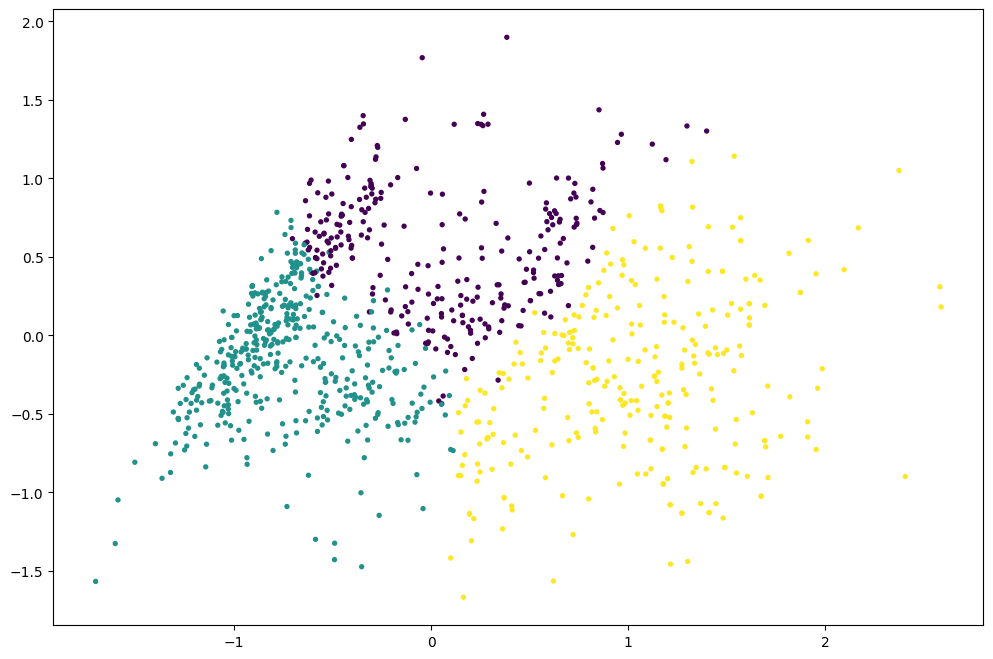

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=classes,s=8.0)